# Seeing through the Smog
## Patricia Paskov - TDI Capstone
### September 2022

Motivation: Environmental, social, and governance (or ESG) scores plays an increasingly important role in investor’s decisions. According to JP Morgan, 500 Billion dollars of investments flowed into ESG funds in 2021. Yet, ESG data is marked by missing data, unclear reporting standards and biased reporting (see below images). 

For S&P 500 companies, or the 500 leading publicly traded companies in the U.S, Bloomberg ESG ratings, touted as one of the best ESG ratings, only provide a ESG score for 134 of 500 companies, a social and environmental score for 411 companies, and a governance score for 481 companies. Socially conscious investors need more complete data.

In this project, I develop a process to impute missing ESG scores for S&P 500 Companies. I begin with the Bloomberg Governance Score, which is the most numerous. I rely heavily on text scraped 10K documents. Given the size of the 10K reports, I employ HashVectorizer to obtain partial fits in batches. I merge the resulting columns with an additional matrix of numerical features (i.e. number of employees, market cap) and one-hot-encoded categorical features (i.e. sector, state). I run these features through a pipeline that applies TFIDF on the text sparse matrix; applies standard scaler to all features; runs singular value decomposition on all features; then predicts the Bloomberg Governance Score with a range of models including Ridge and Random Forest. The pipeline applies GridSearchCV for hyperparameter optimization. Code generates plots of predictions and true values on the test and train set.

The results are sub-optimal, with an R^2 of -0.01177241302659704. These results are in part due to data limitations and computing power. With greater computing power, this analysis could run TFIDF Vectorizer and Transformer in the pipeline itself. This would allow for the interation of min_df and max_df; and allow for different n_grams. Note that while this iteration attempted to integrate n_grams including (1,2) and above, computing constraints posed limitations. More data and understanding of the construction of ESG scores is needed to make this analysis more robust in future iterations.

### Context: Visualizations of Missing Values

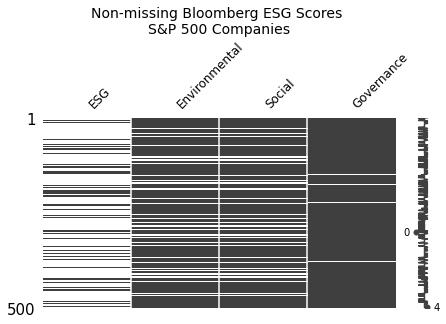

In [1]:
from IPython.display import Image
Image(filename='bloomberg_nonmissing.jpg') 

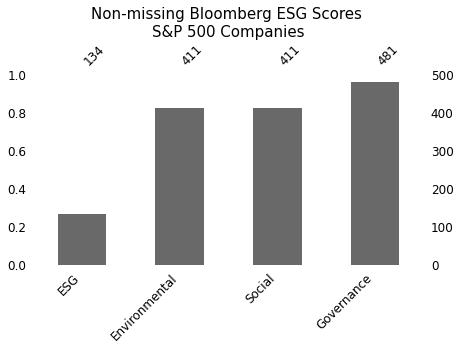

In [2]:
Image(filename='bloomberg_missing.jpg') 

### Predictions

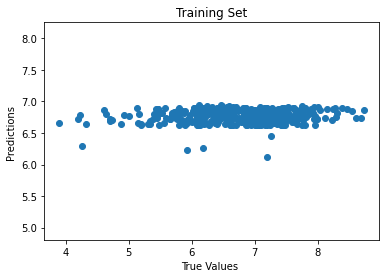

In [9]:
Image(filename='pred_plot_train.jpg') 

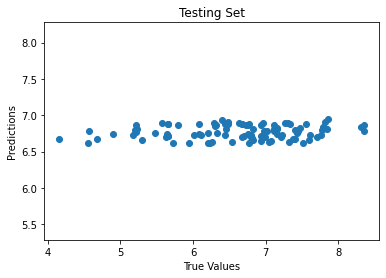

In [10]:
Image(filename='pred_plot_test.jpg') 

### Dataset with Imputed Values

In [6]:
import pandas as pd
preds = pd.read_csv('preds.csv')[['Name', 'GOVERNANCE_SCORE', 'gov_score_pred']]
preds.head()

,Name,GOVERNANCE_SCORE,gov_score_pred
0,LyondellBasell Industries NV,7.01,7.0
1,Signature Bank/New York NY,5.39,7.0
2,American Express Co,7.75,7.0
3,Verizon Communications Inc,7.96,7.0
4,Broadcom Inc,7.43,7.0
